In [1]:
import numpy

from matplotlib import pyplot

import astropy.constants
from astropy.modeling import models, fitting

from enyo.etc import spectrum

In [2]:
# Set the object spectrum based on some emission lines
wave = numpy.power(10., numpy.arange(15000)*5e-5 + numpy.log10(3100))
redshift = 2.0

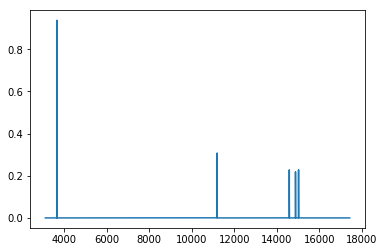

In [3]:
# Get source spectrum; for now assumed to be the same for all parts of the object.
# Flux in 1e-17 erg/s/cm^2
flux = numpy.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
# Line names
names = numpy.array(['Lya', '[OII]3727', '[OII]3729', 'Hb', '[OIII]4960', '[OIII]5008'])
# Wavelength in angstroms
restwave = numpy.array([ 1216., 3727.092, 3729.875, 4862.691, 4960.295, 5008.240])
# Line FWHM in km/s
fwhm = numpy.array([50., 50., 50., 50., 50., 50.])
# Source spectrum in 1e-17 erg/s/cm^2/angstrom
emlspectrum = spectrum.EmissionLineSpectrum(wave, flux, restwave, fwhm, units='km/s',
                                            redshift=redshift, resolution=5000, log=True)
emlspectrum.show()

1.0 3648.0 3648.0 81.6
1.0 11181.3 11181.3 81.7
1.0 11189.6 11189.6 81.7
1.0 14588.1 14588.1 81.6
1.0 14880.9 14880.9 81.6
1.0 15024.7 15024.7 81.6


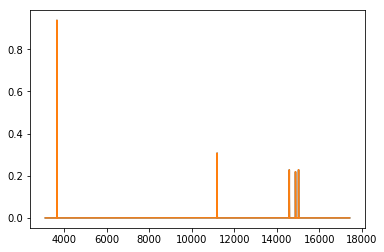

In [4]:
# Fit the data using a Gaussian
fit_g = fitting.LevMarLSQFitter()
fit = numpy.zeros_like(emlspectrum.flux)
for c in restwave:
    g_init = models.Gaussian1D(amplitude=0.1, mean=c*(1+redshift), stddev=1.)
    g = fit_g(g_init, emlspectrum.wave, emlspectrum.flux)
    fit += g(emlspectrum.wave)
    print('{0:.1f} {1:.1f} {2:.1f} {3:.1f}'.format(numpy.sum(numpy.diff(emlspectrum.wave)*g(emlspectrum.wave[1:])),
                                                   c*(1+redshift), g.mean.value,
                    astropy.constants.c.to('km/s').value*g.stddev.value/g.mean.value*numpy.sqrt(8*numpy.log(2))))
pyplot.plot(emlspectrum.wave, emlspectrum.flux)
pyplot.plot(emlspectrum.wave, fit)
#pyplot.xlim([11100,11300])